#### Importing important modules for data manuplication(numpy and pandas) and Data Visulization(Plotly)

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

Importing the data using Pandas read_csv class 

In [5]:
data = pd.read_csv(r'C:\Users\boston\OneDrive - Boston IT Solutions (India) Private Limited\Documents\Boston Python Contents\ML model and content\clusterdata\PimaIndians.csv')

In [18]:
data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,1,89,66,23,94,28.1,0.167,21,negatif
1,0,137,40,35,168,43.1,2.288,33,positif
2,3,78,50,32,88,31.0,0.248,26,positif
3,2,197,70,45,543,30.5,0.158,53,positif
4,1,189,60,23,846,30.1,0.398,59,positif


checking for null values

In [ ]:
data.isnull().sum()

In [7]:
data['test'].value_counts()

negatif    262
positif    130
Name: test, dtype: int64

Dropping the response variable(outcome variable) using the drop method

In [8]:
clusterdata=data.drop('test',axis=1)

Elbow curve to find ideal K value 

In [ ]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    clusassign=model.predict(clusterdata)
    meandist.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1))/ clusterdata.shape[0])

Vusulizating the Elbow curve

In [ ]:
import matplotlib.pylab as plt
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

Fitting the data to the cluster module and predicting the clusters 

In [ ]:
est = KMeans(5)  
part=est.fit(clusterdata)
cluster=est.predict(clusterdata)

adding a new column to the dataframe

In [ ]:
clusterdata['cluster']=cluster

In [19]:
clusterdata

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age
0,1,89,66,23,94,28.1,0.167,21
1,0,137,40,35,168,43.1,2.288,33
2,3,78,50,32,88,31.0,0.248,26
3,2,197,70,45,543,30.5,0.158,53
4,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26
388,1,128,88,39,110,36.5,1.057,37
389,2,88,58,26,16,28.4,0.766,22
390,10,101,76,48,180,32.9,0.171,63


3D scatter plot 

In [ ]:
trace1 = go.Scatter3d(
    x=clusterdata['diabetes'],
    y=clusterdata['glucose'],
    z=clusterdata['bmi'],
    mode='markers',
    marker=dict(
        size=12,
        color=clusterdata['cluster'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='3d-scatter-colorscale')

hierarchy SCIPY module 

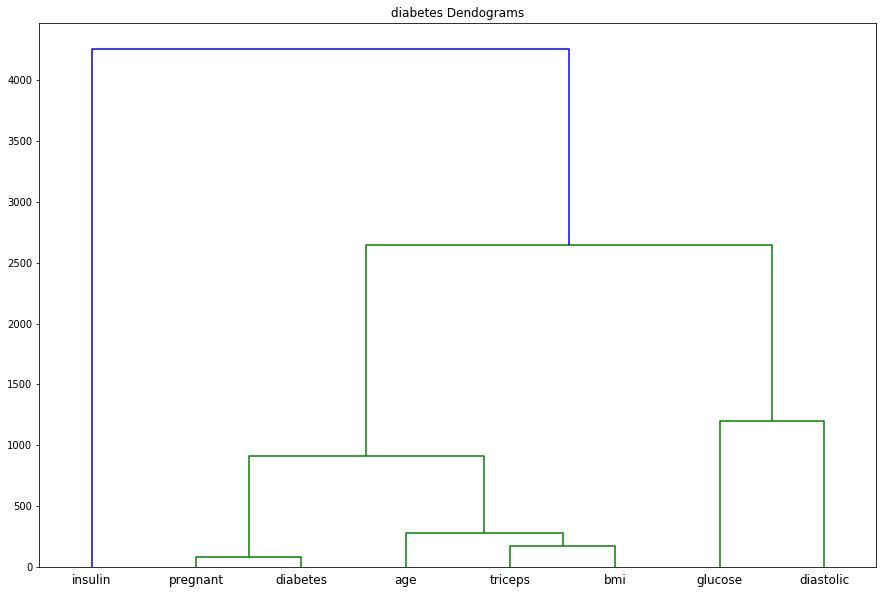

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("diabetes Dendograms")  
dend = shc.dendrogram(shc.linkage(clusterdata.T, method='ward'),labels=clusterdata.columns)

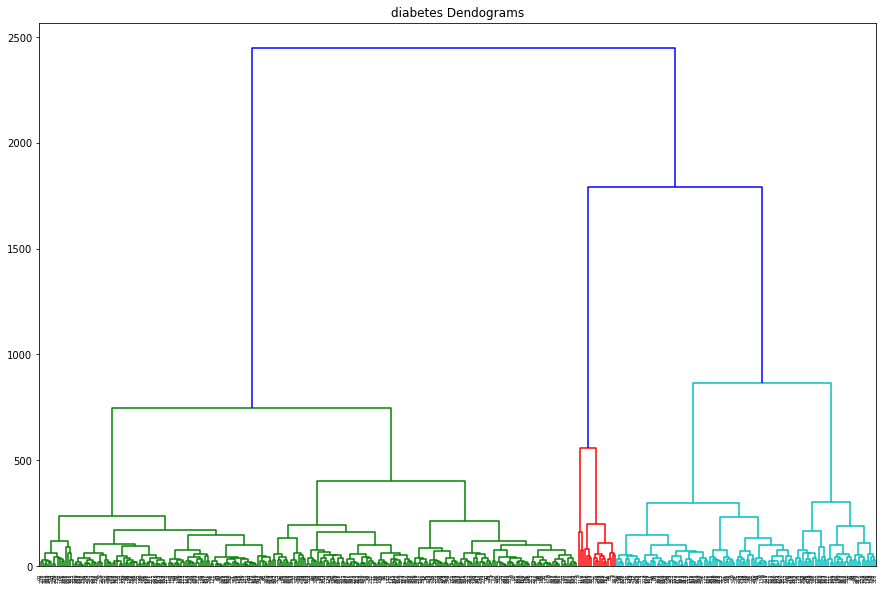

In [10]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("diabetes Dendograms")  
dend = shc.dendrogram(shc.linkage(clusterdata, method='ward'))

In [ ]:
plt.show()

Sklearn module for hierarchy cluster

In [12]:
from sklearn.cluster import AgglomerativeClustering

Parameters:	

n_clusters : int, default=2

    The number of clusters to find.
affinity : string or callable, default: “euclidean”

    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’. If linkage is “ward”, only “euclidean” is accepted.
memory : None, str or object with the joblib.Memory interface, optional

    Used to cache the output of the computation of the tree. By default, no caching is done. If a string is given, it is the path to the caching directory.
connectivity : array-like or callable, optional

    Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data. This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix, such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured.
compute_full_tree : bool or ‘auto’ (optional)

    Stop early the construction of the tree at n_clusters. This is useful to decrease computation time if the number of clusters is not small compared to the number of samples. This option is useful only when specifying a connectivity matrix. Note also that when varying the number of clusters and using caching, it may be advantageous to compute the full tree.
linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)

    Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

        ward minimizes the variance of the clusters being merged.
        average uses the average of the distances of each observation of the two sets.
        complete or maximum linkage uses the maximum distances between all observations of the two sets.
        single uses the minimum of the distances between all observations of the two sets.

pooling_func : callable, default=’deprecated’

    Ignored.

In [13]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

Fitting the data

In [16]:
hc.fit(clusterdata)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

predicting the cluster

In [17]:
hc.fit_predict(clusterdata)

array([0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)